## Data preparation

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [10]:
!wget $data

--2021-09-11 14:27:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  1.33MB/s    in 1.1s    

2021-09-11 14:27:34 (1.33 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# MAke all columns string lower and remove spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for s in strings:
    df[s] = df[s].str.lower().str.replace(' ', '_')

In [65]:
n_cols = df.dtypes[df.dtypes != 'object' ].index
df = df[n_cols]
df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


## Exploratory Data Analysis

In [66]:
for col in df.columns:
    print(f'{col}: \n {df[col].unique()[:5]} \n number of unique values: {df[col].nunique()}')

year: 
 [2011 2012 2013 1992 1993] 
 number of unique values: 28
engine_hp: 
 [335. 300. 230. 320. 172.] 
 number of unique values: 356
engine_cylinders: 
 [ 6.  4.  5.  8. 12.] 
 number of unique values: 9
number_of_doors: 
 [ 2.  4.  3. nan] 
 number of unique values: 3
highway_mpg: 
 [26 28 27 25 24] 
 number of unique values: 59
city_mpg: 
 [19 20 18 17 16] 
 number of unique values: 69
popularity: 
 [3916 3105  819  617 1013] 
 number of unique values: 48
msrp: 
 [46135 40650 36350 29450 34500] 
 number of unique values: 6049


### Distribution of the price

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

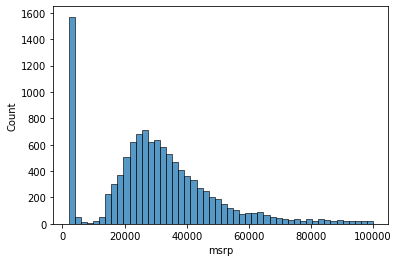

In [68]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [69]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

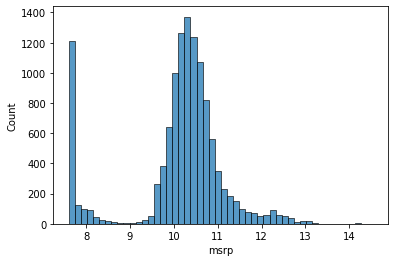

In [70]:
sns.histplot(price_logs, bins=50)

### Missing values

In [71]:
df.isnull().sum()

year                 0
engine_hp           69
engine_cylinders    30
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [76]:
# Replace missing values by mean
engine_hp_mean = df.engine_hp.mean()
engine_cylinders_mean = df.engine_cylinders.mean()
n_doors_mean = df.number_of_doors.mean()

print(f'engine_hp_mean: {engine_hp_mean}, engine_cylinders_mean: {engine_cylinders_mean}, n_doors_mean: {n_doors_mean} ')

engine_hp_mean: 249.38607007176023, engine_cylinders_mean: 5.628828677213059, n_doors_mean: 3.4360933825999327 


In [79]:
df['engine_hp'].fillna(engine_hp_mean, inplace=True)
df['engine_cylinders'].fillna(engine_cylinders_mean, inplace=True)
df['number_of_doors'].fillna(n_doors_mean, inplace=True)

In [80]:
df.isnull().sum()

year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
msrp                0
dtype: int64

## Setting of the validation framework

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
TRAIN_SIZE = .6
# Split the train set from the rest
X_train,  X_, y_train, y_ = train_test_split(df[df.columns[:-1]], df['msrp'], train_size=TRAIN_SIZE)

In [83]:
# SPlit the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=.5)

In [84]:
X_train.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
7328,2016,178.0,4.0,4.0,39,28,1720
11330,2015,109.0,4.0,4.0,40,31,2009
1311,2005,155.0,4.0,4.0,26,21,481
4255,2003,201.0,6.0,3.0,18,15,873
2078,2016,241.0,4.0,4.0,34,25,617


In [85]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [86]:
type(y_train)

pandas.core.series.Series

In [87]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

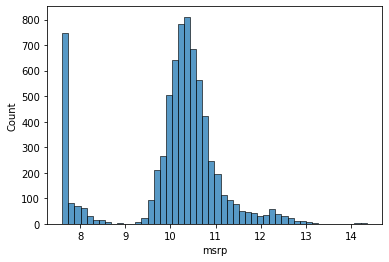

In [88]:
sns.histplot(y_train, bins=50)

## Linear Regression

In [89]:
import torch
from torch import nn
from torch.optim import Adam

In [90]:
class MyLinearReg(nn.Module):
    """
    A class to implement our linear regression model
    """
    def __init__(self, input_dim, output_dim):
        super(MyLinearReg, self).__init__();
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        y_prediction = self.linear(x_in)
        return y_prediction

In [91]:
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1

In [92]:
model = MyLinearReg(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
model.named_parameters()

<generator object Module.named_parameters at 0x7ff306b33900>

In [93]:
NUM_EPOCHS = 100
LEARNING_RATE = 1e-1

In [94]:
# Loss function
loss_fn = nn.MSELoss()

# The optimizer
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

### Training

In [96]:
X_train = torch.tensor(X_train.to_numpy())
y_train = torch.tensor(y_train.values.reshape(-1,1))
X_val = torch.tensor(X_val.to_numpy())
y_val = torch.tensor(y_val.values.reshape(-1,1))
X_test = torch.tensor(X_test.to_numpy())
y_test = torch.tensor(y_test.values.reshape(-1,1))

In [99]:
for epoch in range(NUM_EPOCHS):
    y_pred = model(X_train.float())

    loss = loss_fn(y_pred, y_train.float())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch%20 == 0:
        print(f'Epoch: {epoch}, loss: {loss:.2f}')



Epoch: 0, loss: 310122.69
Epoch: 20, loss: 12119.72
Epoch: 40, loss: 2314.57
Epoch: 60, loss: 313.55
Epoch: 80, loss: 38.45


In [101]:
model.named_parameters()

<generator object Module.named_parameters at 0x7ff3070b9040>